Classify Song Genres from Audio Data

## 1.Preparing the Dataset

In [2]:
#iMPORT NECESSARY PACKAGES
import numpy as np
import pandas as pd


In [3]:
tracks=pd.read_csv(r'C:\Users\saady\Documents\PROJECTS\fma-rock-vs-hiphop.csv') 
echo=pd.read_json(r"C:\Users\saady\Documents\PROJECTS\echonest-metrics.json",precise_float=True)
print(tracks)
print(echo)

       track_id  bit_rate  comments        composer         date_created  \
0           135    256000         1             NaN  2008-11-26 01:43:26   
1           136    256000         1             NaN  2008-11-26 01:43:35   
2           151    192000         0             NaN  2008-11-26 01:44:55   
3           152    192000         0             NaN  2008-11-26 01:44:58   
4           153    256000         0  Arc and Sender  2008-11-26 01:45:00   
...         ...       ...       ...             ...                  ...   
17729    155063    320000         0             NaN  2017-03-24 19:40:43   
17730    155064    320000         0             NaN  2017-03-24 19:40:44   
17731    155065    320000         0             NaN  2017-03-24 19:40:45   
17732    155066    320000         0             NaN  2017-03-24 19:40:47   
17733    155247    320000         0         Fleslit  2017-03-29 01:40:28   

             date_recorded  duration  favorites genre_top          genres  \
0      200

In [4]:
#Merge of the two datasets with only genre and track_id from tracks dataset
echo_tracks=pd.merge(echo,tracks[['track_id','genre_top']],left_on='track_id',right_on='track_id',how='inner')
print(echo_tracks)

      track_id  acousticness  danceability    energy  instrumentalness  \
0            2      0.416675      0.675894  0.634476      1.062807e-02   
1            3      0.374408      0.528643  0.817461      1.851103e-03   
2            5      0.043567      0.745566  0.701470      6.967990e-04   
3          134      0.452217      0.513238  0.560410      1.944269e-02   
4          153      0.988306      0.255661  0.979774      9.730057e-01   
...        ...           ...           ...       ...               ...   
4797    124718      0.412194      0.686825  0.849309      6.000000e-10   
4798    124719      0.054973      0.617535  0.728567      7.215700e-06   
4799    124720      0.010478      0.652483  0.657498      7.098000e-07   
4800    124721      0.067906      0.432421  0.764508      1.625500e-06   
4801    124722      0.153518      0.638660  0.762567      5.000000e-10   

      liveness  speechiness    tempo   valence genre_top  
0     0.177647     0.159310  165.922  0.576661   Hip

## 2. Pairwise relationships between continuous variables
<p>We typically want to avoid using variables that have strong correlations with each other -- hence avoiding feature redundancy -- for a few reasons:</p>
<ul>
<li>To keep the model simple and improve interpretability (with many features, we run the risk of overfitting).</li>
<li>When our datasets are very large, using fewer features can drastically speed up our computation time.</li>
</ul>
<p>To get a sense of whether there are any strongly correlated features in our data, we will use built-in functions in the <code>pandas</code> package.</p>

In [5]:
#find the correlations between variables
correlation=echo_tracks.corr()
correlation.style.background_gradient()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000


## 3. Splitting our data
<p>As mentioned earlier, it can be particularly useful to simplify our models and use as few features as necessary to achieve the best result. Since we didn't find any particularly strong correlations between our features, we can now split our data into an array containing our features, and another containing the labels - the genre of the track. </p>
<p>Once we have split the data into these arrays, we will perform some preprocessing steps to optimize our model development.</p>


In [6]:
from sklearn.model_selection import train_test_split

#Create features 
features=echo_tracks.drop(columns=['genre_top','track_id'],axis=1).values
#Create labels
labels=echo_tracks['genre_top'].values

X_train,X_test,Y_train,Y_test=train_test_split(features,labels,random_state=10)


## 4. Normalizing the feature data
<p>As mentioned earlier, it can be particularly useful to simplify our models and use as few features as necessary to achieve the best result. Since we didn't find any particular strong correlations between our features, we can instead use a common approach to reduce the number of features called <strong>principal component analysis (PCA)</strong>. </p>
<p>It is possible that the variance between genres can be explained by just a few features in the dataset. PCA rotates the data along the axis of highest variance, thus allowing us to determine the relative contribution of each feature of our data towards the variance between classes. </p>
<p>However, since PCA uses the absolute variance of a feature to rotate the data, a feature with a broader range of values will overpower and bias the algorithm relative to the other features. To avoid this, we must first normalize our train and test features. There are a few methods to do this, but a common way is through <em>standardization</em>, such that all features have a mean = 0 and standard deviation = 1 (the resultant is a z-score). </p>

In [7]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


## 5. Principal Component Analysis on our scaled data
<p>Now that we have preprocessed our data, we are ready to use PCA to determine by how much we can reduce the dimensionality of our data. We can use <strong>scree-plots</strong> and <strong>cumulative explained ratio plots</strong> to find the number of components to use in further analyses.</p>
<p>Scree-plots display the number of components against the variance explained by each component, sorted in descending order of variance. Scree-plots help us get a better sense of which components explain a sufficient amount of variance in our data. When using scree plots, an 'elbow' (a steep drop from one data point to the next) in the plot is typically used to decide on an appropriate cutoff.</p>

<BarContainer object of 8 artists>

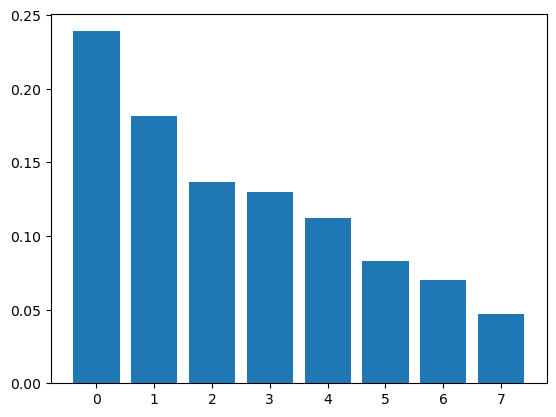

In [8]:
%matplotlib inline
#Importing pyplot and pca
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(X_train_scaled)
exp_var=pca.explained_variance_ratio_
#Plot the result

fig, ax= plt.subplots()
ax.bar(range(pca.n_components_),exp_var)

## 6. Further visualization of PCA
<p>Unfortunately, there does not appear to be a clear elbow in this scree plot, which means it is not straightforward to find the number of intrinsic dimensions using this method. </p>
<p>But all is not lost! Instead, we can also look at the <strong>cumulative explained variance plot</strong> to determine how many features are required to explain, say, about 85% of the variance (cutoffs are somewhat arbitrary here, and usually decided upon by 'rules of thumb'). Once we determine the appropriate number of components, we can perform PCA with that many components, ideally reducing the dimensionality of our data.</p>

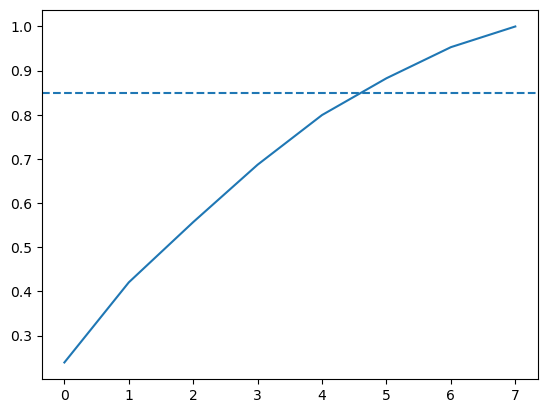

In [9]:
cumsum=np.cumsum(exp_var)
fig,ax=plt.subplots()
ax.plot(cumsum)
ax.axhline(y=0.85,linestyle='--')


## 7. Projecting on to our features
<p>We saw from the plot that 6 features (remember indexing starts at 0) can explain 85% of the variance! </p>
<p>Therefore, we can use 6 components to perform PCA and reduce the dimensionality of our train and test features.</p>

In [19]:
pca=PCA(n_components=6)

pca_train=pca.fit_transform(X_train_scaled)
pca_test=pca.transform(X_test_scaled)

## 8. Train a decision tree to classify genre
<p>Now we can use the lower dimensional PCA projection of the data to classify songs into genres. </p>
<p>Here, we will be using a simple algorithm known as a decision tree. Decision trees are rule-based classifiers that take in features and follow a 'tree structure' of binary decisions to ultimately classify a data point into one of two or more categories. In addition to being easy to both use and interpret, decision trees allow us to visualize the 'logic flowchart' that the model generates from the training data.</p>
<p>Here is an example of a decision tree that demonstrates the process by which an input image (in this case, of a shape) might be classified based on the number of sides it has and whether it is rotated.</p>

In [20]:
#Import the decision tree classifier
from sklearn.tree import DecisionTreeClassifier

#Create an instance

tree= DecisionTreeClassifier(random_state=10)

tree.fit(pca_train,Y_train)
y_pred_tree=tree.predict(pca_test)


## 9. Compare our decision tree to a logistic regression
<p>Although our tree's performance is decent, it's a bad idea to immediately assume that it's therefore the perfect tool for this job -- there's always the possibility of other models that will perform even better! It's always a worthwhile idea to at least test a few other algorithms and find the one that's best for our data.</p>
<p>Sometimes simplest is best, and so we will start by applying <strong>logistic regression</strong>. Logistic regression makes use of what's called the logistic function to calculate the odds that a given data point belongs to a given class. Once we have both models, we can compare them on a few performance metrics, such as false positive and false negative rate (or how many points are inaccurately classified). </p>

In [21]:
#Import Logistic regression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=10)
logreg.fit(pca_train,Y_train)
y_pred_logreg=logreg.predict(pca_test)

#Classification report
from sklearn.metrics import classification_report

clas_rep_tree=classification_report(Y_test,y_pred_tree)
clas_rep_logreg=classification_report(Y_test,y_pred_logreg)

print('Classification report \n', clas_rep_tree)
print("classification report \n",clas_rep_logreg)

Classification report 
               precision    recall  f1-score   support

     Hip-Hop       0.63      0.62      0.62       235
        Rock       0.91      0.91      0.91       966

    accuracy                           0.85      1201
   macro avg       0.77      0.77      0.77      1201
weighted avg       0.85      0.85      0.85      1201

classification report 
               precision    recall  f1-score   support

     Hip-Hop       0.77      0.54      0.64       235
        Rock       0.90      0.96      0.93       966

    accuracy                           0.88      1201
   macro avg       0.83      0.75      0.78      1201
weighted avg       0.87      0.88      0.87      1201



## 10. Balance our data for greater performance
<p>Both our models do similarly well, boasting an average precision of 87% each. However, looking at our classification report, we can see that rock songs are fairly well classified, but hip-hop songs are disproportionately misclassified as rock songs. </p>
<p>Why might this be the case? Well, just by looking at the number of data points we have for each class, we see that we have far more data points for the rock classification than for hip-hop, potentially skewing our model's ability to distinguish between classes. This also tells us that most of our model's accuracy is driven by its ability to classify just rock songs, which is less than ideal.</p>
<p>To account for this, we can weight the value of a correct classification in each class inversely to the occurrence of data points for each class. Since a correct classification for "Rock" is not more important than a correct classification for "Hip-Hop" (and vice versa), we only need to account for differences in <em>sample size</em> of our data points when weighting our classes here, and not relative importance of each class. </p>

In [25]:
hop_only= echo_tracks.loc[echo_tracks['genre_top']=='Hip-Hop']
rock_only=echo_tracks.loc[echo_tracks['genre_top']=='Rock']

#we sample to have the same length for both df

rock_only=rock_only.sample(len(hop_only),random_state=10)

#Concatenate both df
hop_rock_bal=pd.concat([rock_only,hop_only])
features=hop_rock_bal.drop(columns=['genre_top','track_id'],axis=1)
labels=hop_rock_bal['genre_top']

#We re-split the data

X_features,X_labels,Y_features,Y_labels=train_test_split(features,labels,random_state=10)

train_pca=pca.fit_transform(scaler.fit_transform(X_features))
test_pca=pca.transform(scaler.transform(X_labels))


In [26]:
tree=DecisionTreeClassifier(random_state=10)
tree.fit(train_pca,Y_features)
y_labels_tree=tree.predict(test_pca)

logreg=LogisticRegression(random_state=10)
logreg.fit(train_pca,Y_features)
y_labels_logreg=logreg.predict(test_pca)

class_rep_tree=classification_report(Y_labels,y_labels_tree)
class_rep_logreg=classification_report(Y_labels,y_labels_logreg)

print('Classification report \n',class_rep_tree)
print('classification_report \n',class_rep_logreg)

Classification report 
               precision    recall  f1-score   support

     Hip-Hop       0.82      0.77      0.79       230
        Rock       0.78      0.82      0.80       225

    accuracy                           0.80       455
   macro avg       0.80      0.80      0.80       455
weighted avg       0.80      0.80      0.80       455

classification_report 
               precision    recall  f1-score   support

     Hip-Hop       0.84      0.80      0.82       230
        Rock       0.81      0.85      0.83       225

    accuracy                           0.82       455
   macro avg       0.82      0.82      0.82       455
weighted avg       0.83      0.82      0.82       455



## 12. Using cross-validation to evaluate our models
<p>Success! Balancing our data has removed bias towards the more prevalent class. To get a good sense of how well our models are actually performing, we can apply what's called <strong>cross-validation</strong> (CV). This step allows us to compare models in a more rigorous fashion.</p>
<p>Before we can perform cross-validation we will need to create pipelines to scale our data, perform PCA, and instantiate our model of choice - <code>DecisionTreeClassifier</code> or <code>LogisticRegression</code>.</p>
<p>Since the way our data is split into train and test sets can impact model performance, CV attempts to split the data multiple ways and test the model on each of the splits. Although there are many different CV methods, all with their own advantages and disadvantages, we will use what's known as <strong>K-fold</strong> CV here. K-fold first splits the data into K different, equally sized subsets. Then, it iteratively uses each subset as a test set while using the remainder of the data as train sets. Finally, we can then aggregate the results from each fold for a final model performance score.</p>

In [27]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.pipeline import Pipeline

tree_pipe=Pipeline([('scaler',StandardScaler()),('pca',PCA(n_components=6)),('tree',DecisionTreeClassifier(random_state=10))])
logreg_pipe=Pipeline([("scaler",StandardScaler()),('pca',PCA(n_components=6)),('logreg',LogisticRegression(random_state=10))])

kf=KFold(n_splits=10)

#train our models using Kfolds 

tree_score=cross_val_score(tree_pipe,features,labels,cv=kf)
logreg_score=cross_val_score(logreg_pipe,features,labels,cv=kf)

print('Decision Tree',np.mean(tree_score), 'Logistic Regression', np.mean(logreg_score))

Decision Tree 0.7582417582417582 Logistic Regression 0.782967032967033
